<a href="https://colab.research.google.com/github/yh08037/Introduction-to-Intelligent-Systems/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedforward Neural Network
## 1. Implement classifier using FFNN
* FFNN shound consist of three layers, in which the hidden layer has 5 neurons.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1. / (np.ones(x.shape) + np.exp(-x))

def SSE(g, y):
    if g.shape != y.shape :
        print("Invalid arguments for SEE")
        exit()
    result = 0.
    for i in range(g.shape[0]):
        for j in range(g.shape[1]):
            result += (g[i][j] - y[i][j]) ** 2
    return result / 2.


# read data file

name_file = "./data_FFNN.txt"

columns = ['x1', 'x2', 'y']
data_in = pd.read_csv(name_file, names=columns, sep=' ')


# define x

x1 = np.asarray(data_in['x1']).reshape(-1, 1)
x2 = np.asarray(data_in['x2']).reshape(-1, 1)

x = np.concatenate((x1.reshape(-1, 1), x2.reshape(-1, 1)), axis=1)


# define I, N, J, K

# N : number of features = 2
# I : number of data = 51
# J : number of output = 2
# k : nmmber of hidden neurons = 5

I, N = x.shape
J = 2 
K = 5  


# define y

y2 = np.asarray(data_in['y'])
y1 = np.empty(y2.shape)

for i in range(I):
    y1[i] = 0 if y2[i] == 1  else 1
    
y = np.concatenate((y1.reshape(-1, 1), y2.reshape(-1, 1)), axis=1)


# define x_bar

x_bar = np.concatenate((np.ones((I, 1)), x), axis=1)


#initialize theta randomly

v = np.concatenate((np.ones((1, K)), np.random.rand(N, K)), axis=0)
w = np.concatenate((np.ones((1, J)), np.random.rand(K, J)), axis=0)


# define alpha1, alpha2

alpha1 = 0.01
alpha2 = 0.01

epsilon = 0.0001

cnt = 0

E_present = 0.
E_previous = 0.

while cnt < 2 or abs(E_present - E_previous) > epsilon: 
    x_bar_bar = np.dot(x_bar, v)
    F = sigmoid(x_bar_bar)
    F_bar = np.concatenate((np.ones((I, 1)), F), axis=1)
    F_bar_bar = np.dot(F_bar, w)
    G = sigmoid(F_bar_bar)

    for k in range(0, K+1):
        for j in range(0, J):
            for i in range(0, I):
                w[k][j] -= alpha1 * (G[i][j] - y[i][j]) * G[i][j] * (1 - G[i][j]) * F_bar[i][k]

    for n in range(0, N+1):
        for k in range(0, K):
            for i in range(0, I):
                for j in range(0, J):
                    v[n][k] -= alpha2 * (G[i][j] - y[i][j]) * G[i][j] * (1 - G[i][j]) * w[k][j] * F[i][k] * (1 - F[i][k]) * x_bar[i][n]

    if cnt > 0 : E_previous = E_present
    
    E_present = SSE(G, y)
    
    cnt += 1
    
    if cnt % 100 == 0:
        print("iter : %d, error : %f" %(cnt, E_present))


iter : 100, error : 12.411261
iter : 200, error : 12.385075
iter : 300, error : 12.357880
iter : 400, error : 12.330133
iter : 500, error : 12.302307
iter : 600, error : 12.274966
iter : 700, error : 12.249057
iter : 800, error : 12.224782
iter : 900, error : 12.188957
iter : 1000, error : 12.126523
iter : 1100, error : 12.038012
iter : 1200, error : 11.906059
iter : 1300, error : 11.700207
iter : 1400, error : 11.379298
iter : 1500, error : 10.903235
iter : 1600, error : 10.249704
iter : 1700, error : 9.426731
iter : 1800, error : 8.486255
iter : 1900, error : 7.520366
iter : 2000, error : 6.620100
iter : 2100, error : 5.837927
iter : 2200, error : 5.186200
iter : 2300, error : 4.653758
iter : 2400, error : 4.220585
iter : 2500, error : 3.866212
iter : 2600, error : 3.573412
iter : 2700, error : 3.328919
iter : 2800, error : 3.122803
iter : 2900, error : 2.947634
iter : 3000, error : 2.797841
iter : 3100, error : 2.669278
iter : 3200, error : 2.558892
iter : 3300, error : 2.464348
ite

## 3. What are the optimal parameter values?

In [19]:
print('parameter values for hidden layer')
print(v)

print()

print('parameter values for output layer')
print(w)

parameter values for hidden layer
[[ 1.3674581   1.44340662  1.18384505  1.1946904  -5.78894619]
 [ 0.69415356  0.82275193  1.40943266  2.46403269  0.61993784]
 [ 1.72476131  1.41769348  0.41345862 -0.72518971  1.4141445 ]]

parameter values for output layer
[[  2.29517398  -1.67378686]
 [  1.74137041  -1.45202915]
 [  1.28317806  -1.08800163]
 [  0.31318336  -1.29082092]
 [  0.1738838   -0.32164181]
 [-10.24919828  10.25838373]]


## 4. Show that your classifier can correctly classify for (2, 2), (4, 4)

In [0]:
def h(_x1, _x2):
    _F = sigmoid(np.dot(np.asarray([[1, _x1, _x2]]), v))
    _F_bar = np.concatenate((np.ones((1, 1)), _F), axis=1)
    _G = sigmoid(np.dot(_F_bar, w))
    return _G[0, 0]

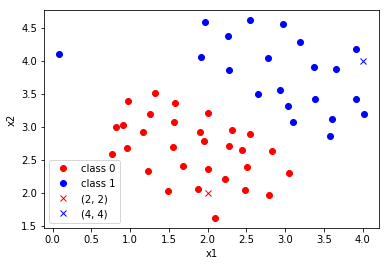

In [33]:
# region a : 0 / b : 1

x_a1 = x1[y1 == 1]
x_a2 = x2[y1 == 1]

x_b1 = x1[y2 == 1]
x_b2 = x2[y2 == 1]

plt.plot(x_a1, x_a2, 'ro', label = "class 0")
plt.plot(x_b1, x_b2, 'bo', label = "class 1")

plt.plot(2, 2, 'rx', label = "(2, 2)")
plt.plot(4, 4, 'bx', label = "(4, 4)")

plt.xlabel('x1')
plt.ylabel('x2')

plt.legend(loc='lower left')

plt.show()